# Oxford Air Pollution Analysis

## Workflow

1) Retreive Data from URL's

2) Combine data into single dataframe

3) Graphs showing variations over the day / week / year

In [1]:
#import the necessary functions for the program
from urllib.request import urlretrieve
import pandas as pd
pd.options.display.float_format = '{:,.1f}'.format
import datetime
import matplotlib.pyplot as plt
import calendar as cal
plt.style.use('seaborn')
from reading_workflow.data import clean_data

In [2]:
#create datasets for each of the four available years
data_2020 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/OX_2020.csv')
data_2019 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/OX_2019.csv')
data_2018 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/OX_2018.csv')
data_2017 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/OX_2017.csv')
data_2016 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/OX_2016.csv')

(0, 224.48957322127208)

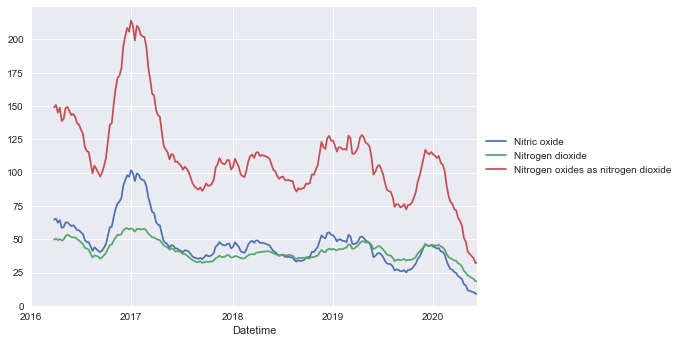

In [3]:
#concatenate all the years into a single dataset and plot the full timeline as a graph
data_total = pd.concat([data_2020,data_2019,data_2018,data_2017,data_2016]) #create a merged dataset of all the yearly data combined
plot = data_total.resample('W').mean().rolling(13).mean().plot() #create a rolling average to remove spikes
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) #move the legend out of the plot
plot.set_ylim(0,None)

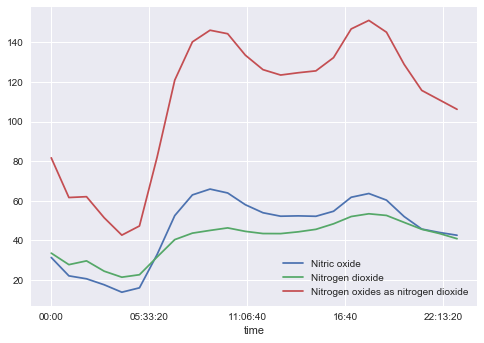

In [4]:
#plot the data by hour in the day
data_total.groupby(data_total.index.time).mean().plot()

From the above graph it's clear that only three entries are heavily affected by time of the day.
That suggests these are the ones most caused by the increases in traffic at rush hour.

(0, 254.03598443939885)

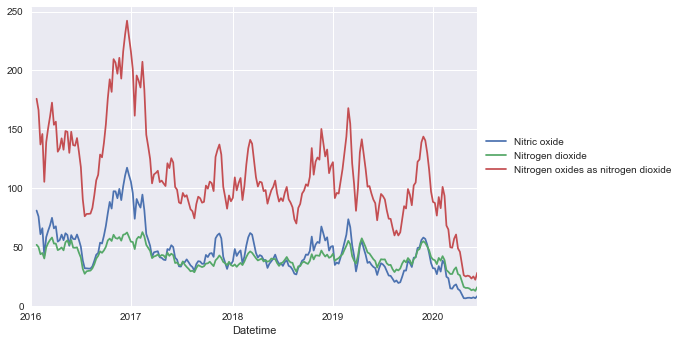

In [5]:
#Stripping out all the other measurements
data_total = data_total[['Nitric oxide','Nitrogen dioxide','Nitrogen oxides as nitrogen dioxide']]
plot = data_total.resample('W').mean().rolling(4).mean().plot() #create a rolling average to remove spikes
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) #move the legend out of the plot
plot.set_ylim(0,None)

In [6]:
Lockdown = datetime.datetime(2020,3,17)
print("Lockdown began in the UK on week " + Lockdown.strftime("%V"))

Lockdown began in the UK on week 12


Text(0.5, 0, 'Week')

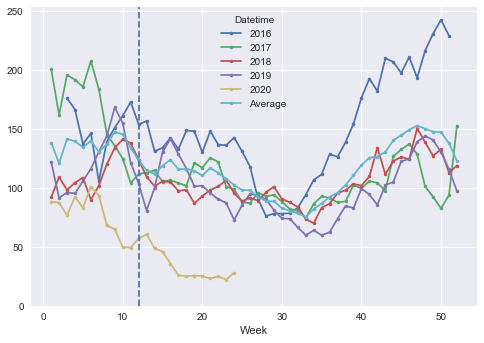

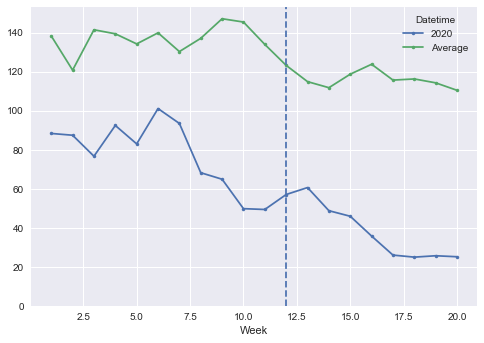

In [7]:
# plot the first 20 weeks of each of the available years graph of 'nitrogen oxides as nitrogen dioxide'
data_total_daily = data_total.resample('W').mean().rolling(4).mean()
pivoted = data_total_daily.pivot_table('Nitrogen oxides as nitrogen dioxide', 
                                        index=[data_total_daily.index.week], 
                                        columns=data_total_daily.index.year)

pivoted['Average'] = pivoted[[2016,2017,2018,2019]].mean(axis=1)
pivoted.style.format(",")
pivoted.iloc[0:150].plot(marker='.')
plt.xlabel('Week')
plt.ylim(0)
plt.axvline(x=12, linestyle='--', label='UK Lockdown begins 17/03/2020')
pivoted[[2020,'Average']].iloc[0:20].plot(marker='.')
plt.ylim(0)
plt.axvline(x=12, linestyle='--', label='UK Lockdown begins 17/03/2020')
plt.xlabel('Week')

In [8]:
pivoted.head()

Datetime,2016,2017,2018,2019,2020,Average
Datetime,,,,,,
1,nan,201.0,91.7,122.0,88.3,138.3
2,nan,161.5,109.1,91.5,87.4,120.7
3,175.9,195.7,98.1,95.9,76.6,141.4
4,166.3,191.4,104.3,95.4,92.4,139.3
5,137.1,185.5,108.6,105.5,82.9,134.2


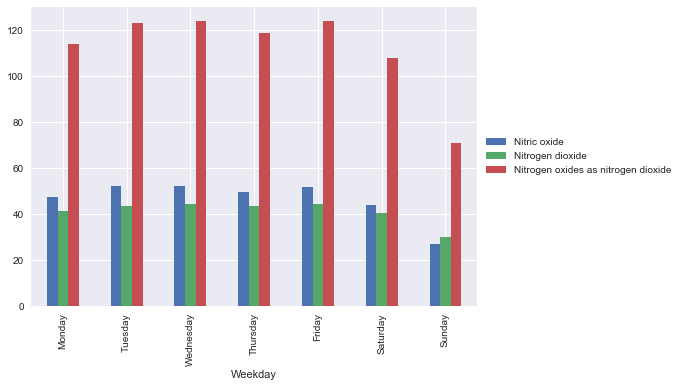

In [9]:
# resample the data to be daily by getting the average hourly reading
# 
data_total_daily = data_total.resample('d').mean()
data_total['Weekday'] = data_total.index.strftime('%A')
weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data_total_weekday = data_total.groupby('Weekday').mean().reindex(weekday).plot(kind='bar')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) #move the legend out of the plot

In [10]:
data_total.head()

,Nitric oxide,Nitrogen dioxide,Nitrogen oxides as nitrogen dioxide,Weekday
Datetime,,,,
2020-01-01 01:00:00,27.2,40.6,82.2,Wednesday
2020-01-01 02:00:00,34.8,36.3,89.6,Wednesday
2020-01-01 03:00:00,56.2,47.9,134.0,Wednesday
2020-01-01 04:00:00,48.5,36.2,110.5,Wednesday
2020-01-01 05:00:00,58.1,43.0,132.1,Wednesday


In [11]:
this_is_the_interesting_bit = 0